Установим файл

In [1]:
!gdown 1v8gr_cWQrSWdnIv1-EQ-gb04aFkOU0_h

Downloading...
From: https://drive.google.com/uc?id=1v8gr_cWQrSWdnIv1-EQ-gb04aFkOU0_h
To: /content/8148429-uhd_3840_2160_30fps.mp4
100% 18.4M/18.4M [00:00<00:00, 39.5MB/s]


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Проверим считывание видеофайла

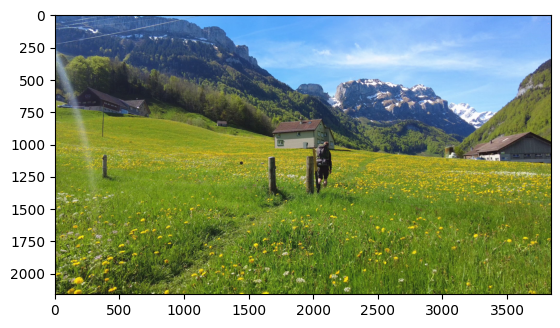

In [667]:
cap = cv2.VideoCapture("/content/8148429-uhd_3840_2160_30fps.mp4")
cap.set(cv2.CAP_PROP_POS_FRAMES, 185)
ret, frame = cap.read()
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb)

Создадим функцию обработки кадра.
Здесь используется предобработка в виде эквалайзинга и размытия по Гауссу, как рекомендуется на [форуме](https://answers.opencv.org/question/26280/background-color-similar-to-object-color-how-isolate-it/) . Далее совмещаю несколько масок логическим И.

In [662]:
def process_frame(frame):
  img_hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
  img_hsv[:, :, 1] = cv2.equalizeHist(img_hsv[:, :, 1])
  frame = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
  frame = cv2.GaussianBlur(frame, (43, 43), 0)
  image_threshold = cv2.inRange(frame,(22, 24, 22), (105, 77, 68))
  img_shadow = cv2.inRange(frame, (31, 45, 10), (93, 97, 34))
  img_mount = cv2.inRange(frame, (21, 25, 30), (180, 175, 157))
  img = image_threshold & np.logical_not(img_mount) & np.logical_not(img_shadow)
  plt.imshow(img, cmap='gray')
  return img

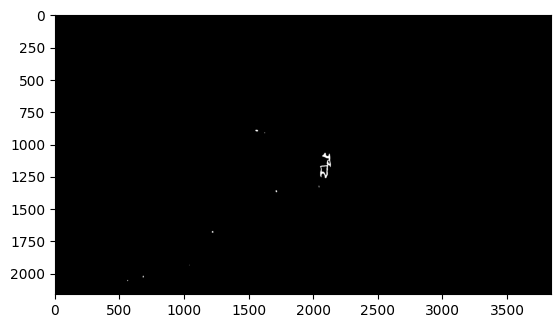

In [668]:
img = process_frame(frame_rgb)

Далее находим центр наибольшего белого контура

In [573]:
def find_centroid(img):
  contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  if len(contours) > 0:
    largest_contour = max(contours, key=cv2.contourArea)
    moments = cv2.moments(largest_contour)
    if moments["m00"] != 0:
        cx = int(moments["m10"] / moments["m00"])
        cy = int(moments["m01"] / moments["m00"])
    else:
        cx, cy = 0, 0  # Fallback if the area is zero
    print(f"Centroid of white pixels: ({cx}, {cy})")
    return (cx, cy)

Проверяем работу функции

Centroid of white pixels: (2090, 1175)


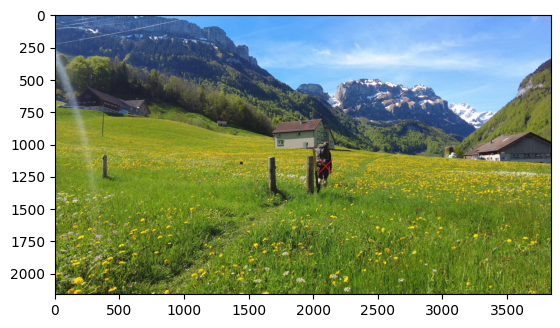

In [669]:
coordinates = find_centroid(img.astype(np.uint8))
cv2.drawMarker(frame_rgb, coordinates, color=(255, 0, 0), thickness=5,
   markerType= cv2.MARKER_TILTED_CROSS, line_type=cv2.LINE_AA,
   markerSize=100)
plt.imshow(frame_rgb)
cap.release()

Теперь создадим полное видео, не забывая сохранять промежуточные точки для отрисовки их на следующих кадрах

Centroid of white pixels: (100, 1727)
Centroid of white pixels: (98, 1726)
Centroid of white pixels: (99, 1728)
Centroid of white pixels: (419, 1751)
Centroid of white pixels: (448, 1785)
Centroid of white pixels: (484, 1779)
Centroid of white pixels: (531, 1824)
Centroid of white pixels: (571, 1817)
Centroid of white pixels: (527, 1401)
Centroid of white pixels: (656, 1773)
Centroid of white pixels: (635, 1309)
Centroid of white pixels: (752, 1603)
Centroid of white pixels: (664, 1320)
Centroid of white pixels: (722, 1263)
Centroid of white pixels: (687, 1397)
Centroid of white pixels: (753, 1403)
Centroid of white pixels: (771, 1403)
Centroid of white pixels: (875, 1303)
Centroid of white pixels: (821, 1394)
Centroid of white pixels: (838, 1404)
Centroid of white pixels: (867, 1408)
Centroid of white pixels: (889, 1411)
Centroid of white pixels: (917, 1407)
Centroid of white pixels: (946, 1410)
Centroid of white pixels: (1027, 1333)
Centroid of white pixels: (1060, 1330)
Centroid of 

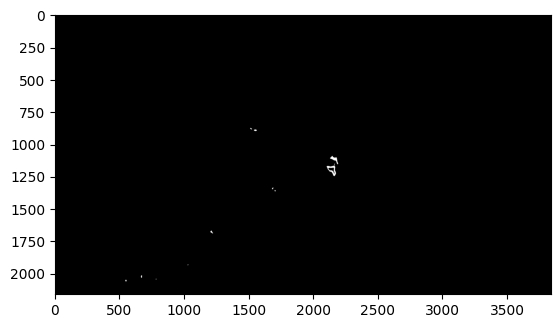

In [670]:
cap = cv2.VideoCapture("/content/8148429-uhd_3840_2160_30fps.mp4")
writer = cv2.VideoWriter('result.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 30, (int(cap.get(3)),int(cap.get(4))))
mas = []
while(cap.isOpened()):
  ret, frame = cap.read()
  if ret == True:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = process_frame(frame_rgb)
    mas.append(find_centroid(img.astype(np.uint8)))
    for coordinates in mas:
      cv2.drawMarker(frame_rgb, coordinates, color=(255, 0, 0), thickness=5,
        markerType= cv2.MARKER_TILTED_CROSS, line_type=cv2.LINE_AA,
        markerSize=100
      )
    writer.write(cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR))


  # Break the loop
  else:
    break

# When everything done, release the video capture object
cap.release()
writer.release()

Итоговое видео доступно по ссылке:

https://answers.opencv.org/question/26280/background-color-similar-to-object-color-how-isolate-it/